# Q6. Using the data from Question 3, write code to analyze the data and answer the following questions 

Data link: Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

Note:
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
1. Get all Pokemons whose spawn rate is less than 5%
2. Get all Pokemons that have less than 4 weaknesses
3. Get all Pokemons that have no multipliers at all
4. Get all Pokemons that do not have more than 2 evolutions
5. Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
6. Get all Pokemon who have more than two types of capabilities

Number of Pokemons whose spawn rate is less than 5%: 65
Number of Pokemons that have less than 4 weaknesses: 102
Number of Pokemons that have no multipliers at all: 81
Number of Pokemons that do not have more than 2 evolutions: 150
Number of Pokemons whose spawn time is less than 300 seconds: 145
Number of Pokemon who have more than two types of capabilities: 0


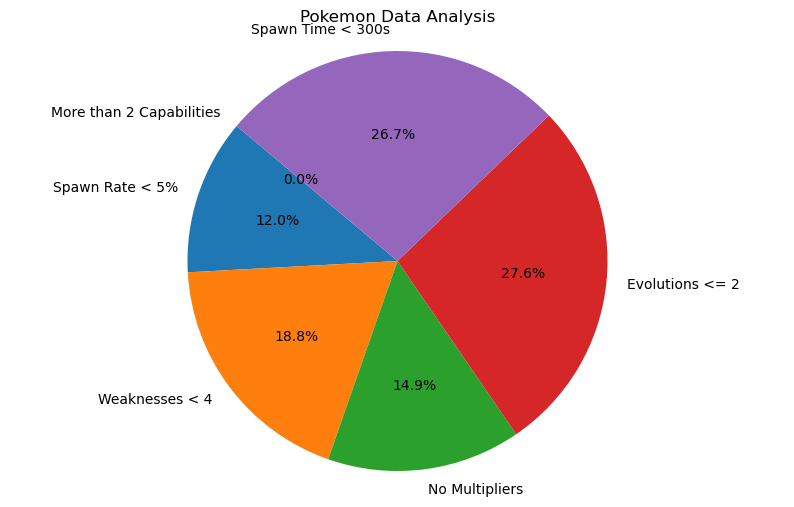

In [1]:
import requests
import json
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    pokemons = data["pokemon"]
    
    spawn_rate_threshold = 0.05  # 5%
    pokemons_spawn_rate_less_than_5 = [pokemon for pokemon in pokemons if pokemon["spawn_chance"] < spawn_rate_threshold]
    print(f"Number of Pokemons whose spawn rate is less than 5%: {len(pokemons_spawn_rate_less_than_5)}")
    
    weaknesses_threshold = 4
    pokemons_less_than_4_weaknesses = [pokemon for pokemon in pokemons if len(pokemon["weaknesses"]) < weaknesses_threshold]
    print(f"Number of Pokemons that have less than 4 weaknesses: {len(pokemons_less_than_4_weaknesses)}")
    
    pokemons_no_multipliers = [pokemon for pokemon in pokemons if not pokemon.get("multipliers")]
    print(f"Number of Pokemons that have no multipliers at all: {len(pokemons_no_multipliers)}")
    
    evolutions_threshold = 2
    pokemons_less_than_2_evolutions = [pokemon for pokemon in pokemons if len(pokemon.get("next_evolution", [])) <= evolutions_threshold]
    print(f"Number of Pokemons that do not have more than 2 evolutions: {len(pokemons_less_than_2_evolutions)}")
    
    spawn_time_threshold = 300  # seconds
    pokemons_spawn_time_less_than_300 = [pokemon for pokemon in pokemons if pokemon["spawn_time"] != "N/A" and int(pokemon["spawn_time"].split(":")[0]) < spawn_time_threshold]
    print(f"Number of Pokemons whose spawn time is less than 300 seconds: {len(pokemons_spawn_time_less_than_300)}")
    
    capabilities_threshold = 2
    pokemons_more_than_2_capabilities = [pokemon for pokemon in pokemons if len(pokemon.get("type", [])) > capabilities_threshold]
    print(f"Number of Pokemon who have more than two types of capabilities: {len(pokemons_more_than_2_capabilities)}")
    
    labels = ["Spawn Rate < 5%", "Weaknesses < 4", "No Multipliers", "Evolutions <= 2", "Spawn Time < 300s", "More than 2 Capabilities"]
    sizes = [
        len(pokemons_spawn_rate_less_than_5),
        len(pokemons_less_than_4_weaknesses),
        len(pokemons_no_multipliers),
        len(pokemons_less_than_2_evolutions),
        len(pokemons_spawn_time_less_than_300),
        len(pokemons_more_than_2_capabilities)
        ]
    
    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title("Pokemon Data Analysis")
    plt.show()
    
else:
    print("Error occurred while fetching data from the API.")
